# SUPPORT VECTOR 

### 1) Dataset - SalaryData

### Objective:-
###             Prepare a classification model using SVM for salary

In [6]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
data_train = pd.read_csv("SalaryData_Train(1).csv")

In [10]:
data_test = pd.read_csv("SalaryData_Test(1).csv")

In [11]:
data_train[:3]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
data_test[:3]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [13]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

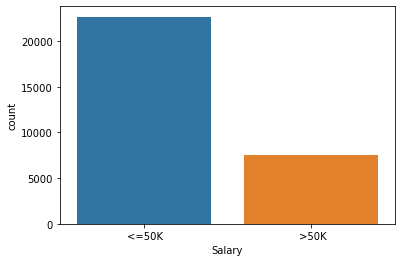

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.countplot(data_train["Salary"])

In [16]:
from sklearn.preprocessing import LabelEncoder
data_train = data_train.apply(LabelEncoder().fit_transform)
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [17]:
data_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
data_test = data_test.apply(LabelEncoder().fit_transform)
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [19]:
data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [20]:
X_train = data_train.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_train = data_train["Salary"]
print(np.unique(Y_train))
X_train.head()

[0 1]


,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,24,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


In [21]:
X_test = data_test.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_test = data_test["Salary"]
print(np.unique(Y_test))
X_test.head()

[0 1]


,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


In [22]:
X_train.shape, Y_train.shape

((30161, 7), (30161,))

In [23]:
X_test.shape, Y_test.shape

((15060, 7), (15060,))

In [24]:
# Linear Support Vector Machine
from sklearn.svm import SVC
svc = SVC(gamma = 0.22)
svc.fit(X_train, Y_train)
# Y_pred = Logreg.predict(X_test)
score_svc = svc.score(X_test, Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9072377158034528


In [25]:
# Radical Spport Vector Machine
from sklearn import svm 
svc_redical = svm.SVC(kernel='rbf', C=1, gamma = 0.22)
svc_redical.fit(X_train, Y_train.values.ravel())
score_svc_redical = svc_redical.score(X_test, Y_test)
print("The Accuracy of Radical SVC Model is", score_svc_redical)

The Accuracy of Radical SVC Model is 0.9072377158034528


In [26]:
# Radical Spport Vector Machine
from sklearn import svm 
svc_redical = svm.SVC(kernel='rbf', C=1, gamma = 0.22)
svc_redical.fit(X_train, Y_train.values.ravel())
score_svc_redical = svc_redical.score(X_test, Y_test)
print("The Accuracy of Radical SVC Model is", score_svc_redical)

The Accuracy of Radical SVC Model is 0.9072377158034528


In [32]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.33)
svc.fit(X_train, Y_train)
# Y_pred = logreg.preidct(X_test)
score_svc = svc.score(X_test, Y_test)
print('The Accuracy of SVC is', score_svc)

The Accuracy of SVC is 0.8963479415670651


In [33]:
from sklearn import svm
svc_radical = svm.SVC(kernel = 'poly', C=1,gamma = 0.33)
svc_radical.fit(X_train, Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)

The accuracy of poly SVC Model is 0.999933598937583


In [34]:
clf = SVC(kernel = 'poly', C=1, gamma = 0.33)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 99.99335989375831


array([[11360,     0],
       [    1,  3699]], dtype=int64)

In [35]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



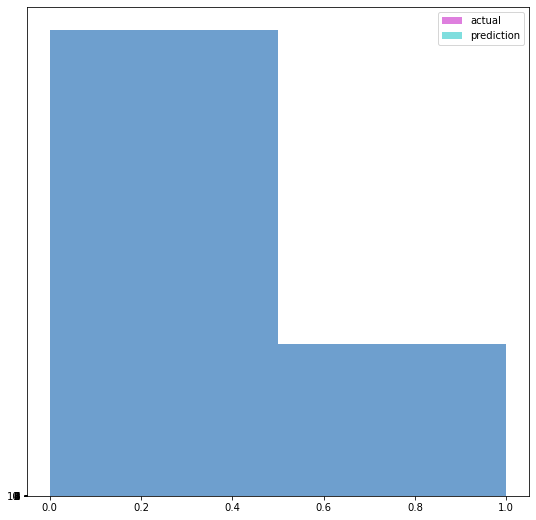

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins = 2)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:-
###                      Poly SVC model is predict the test dataset with 99% accuracy.

### 2) Dataset - Forest Fires


### Objective:-
###               classify the Size_Categorie using SVM

In [38]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
data = pd.read_csv("forestfires.csv")
data[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [40]:
label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [41]:
data['day'] = label_encoder.fit_transform(data['day'])
data['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [42]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0)

In [43]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [44]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.967948717948718

In [45]:
model_linear = SVC(kernel = "poly")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.7564102564102564

In [46]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.7243589743589743

In [47]:
train_X.shape, train_y.shape,
test_X.shape, test_y.shape

((156, 30), (156,))

In [48]:
import warnings
warnings.filterwarnings("ignore")
clf = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma':[50,5,10,0,5,0,1],'C':[25,22,20,18,16,15,14,13,12,11,10,0,1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 22, 20, 18, 16, 15, 14, 13, 12, 11, 10, 0,
                                1, 0.001],
                          'gamma': [50, 5, 10, 0, 5, 0, 1],
                          'kernel': ['rbf']}])

In [49]:
gsv.best_params_,gsv.best_score_

({'C': 25, 'gamma': 1, 'kernel': 'rbf'}, 0.7479729729729729)

In [50]:
clf = SVC(C=22, gamma = 0.1)
clf.fit(train_X,train_y)
pred_y = clf.predict(test_X)

In [51]:
accuracy = accuracy_score(test_y, pred_y)*100
accuracy

71.15384615384616

In [52]:
confusion_matrix(test_y, pred_y)

array([[  1,  45],
       [  0, 110]], dtype=int64)

In [53]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

       large       1.00      0.02      0.04        46
       small       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.85      0.51      0.44       156
weighted avg       0.80      0.71      0.60       156



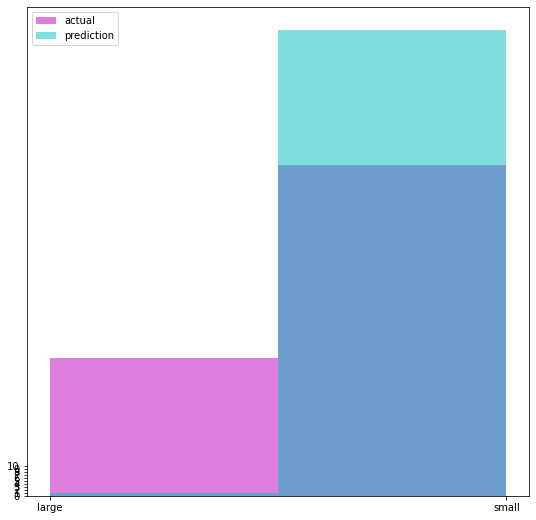

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(test_y, color = 'm',alpha = 0.5, label = 'actual', bins = 2)
ax.hist(pred_y, color = 'c',alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

### Conclusion:- 
###                 Ploy SVC model is predict the test dataset with 71% accuracy